<a href="https://colab.research.google.com/github/arshiakoul/ai-anemia-detection/blob/main/CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mendeley Dataset**

In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
import io
import zipfile
zip_ref = zipfile.ZipFile(io.BytesIO(uploaded['archive (1).zip']), 'r') ## eyes defy anemia dataset
zip_ref.extractall('/content/anemia_dataset')
zip_ref.close()

In [ ]:
import os
os.listdir('/content/anemia_dataset') ## whatever shows up here should be used in file path. for me it was dataset anemia

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
italy_df = pd.read_excel('/content/anemia_dataset/dataset anemia/Italy/Italy.xlsx', engine='openpyxl')
india_df = pd.read_excel('/content/anemia_dataset/dataset anemia/India/India.xlsx', engine='openpyxl')

In [ ]:
## adding labels for ease later
italy_df['country'] = 'Italy'
india_df['country'] = 'India'

## combining both dfs
df = pd.concat([italy_df, india_df], ignore_index=True)

In [ ]:
## classify as anemic or not based on HB levels
# map patient number to image paths

## next steps:
## make image preprocessor
##load images in batches
## build CNN

# **Ghana Anemia Dataset**

In [ ]:
import os, glob, subprocess, pandas as pd

DATASET_DIR = "/content/CP-AnemiC (A Conjunctival Pallor) Dataset from Ghana"
rar_files = glob.glob(os.path.join(DATASET_DIR, "*.rar"))
if not rar_files:
    raise FileNotFoundError("No .rar found in " + DATASET_DIR)
RAR_PATH = rar_files[0]
EXTRACT_DIR = os.path.join(DATASET_DIR, "extracted")
os.makedirs(EXTRACT_DIR, exist_ok=True)

!apt-get -y update >/dev/null
!apt-get -y install unrar >/dev/null

subprocess.run(["unrar", "x", "-o+", RAR_PATH, EXTRACT_DIR], check=True)

img_exts = {".jpg",".jpeg",".png",".bmp",".tif",".tiff",".webp"}
paths = []
for r, d, f in os.walk(EXTRACT_DIR):
    for name in f:
        if os.path.splitext(name)[1].lower() in img_exts:
            paths.append(os.path.join(r, name))

df = pd.DataFrame([(p, os.path.basename(os.path.dirname(p))) for p in paths],
                  columns=["image_path","label"])
print("Images:", len(df))
df


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Images: 710


,image_path,label
0,/content/CP-AnemiC (A Conjunctival Pallor) Dat...,Non-anemic
1,/content/CP-AnemiC (A Conjunctival Pallor) Dat...,Non-anemic
2,/content/CP-AnemiC (A Conjunctival Pallor) Dat...,Non-anemic
3,/content/CP-AnemiC (A Conjunctival Pallor) Dat...,Non-anemic
4,/content/CP-AnemiC (A Conjunctival Pallor) Dat...,Non-anemic
...,...,...
705,/content/CP-AnemiC (A Conjunctival Pallor) Dat...,Anemic
706,/content/CP-AnemiC (A Conjunctival Pallor) Dat...,Anemic
707,/content/CP-AnemiC (A Conjunctival Pallor) Dat...,Anemic
708,/content/CP-AnemiC (A Conjunctival Pallor) Dat...,Anemic


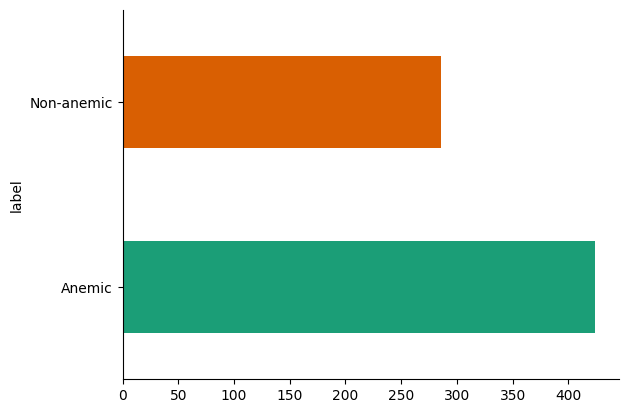

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)